In [ ]:
# The goal for this analysis is to predict credit card fraud in the transactional data.
# Using tensorflow to build the predictive model, 
# 참조 url
# https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow/comments

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# no missing values, that makes things a little easier..

In [8]:
print('Fraud')
print(df.Time[df.Class==1].describe())
print()
print('Normal')
print(df.Time[df.Class==0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


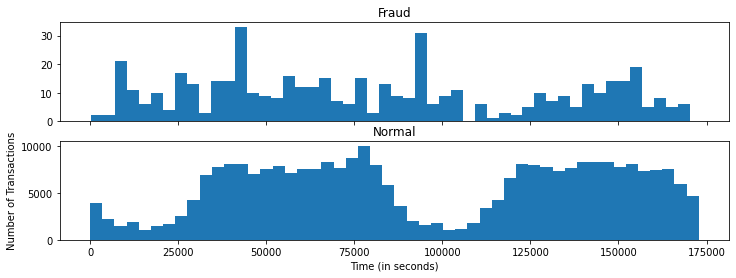

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(12, 4))

bins = 50

ax1.hist(df.Time[df.Class==1], bins= bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class==0], bins= bins)
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
# 시간 특성에 대한 거래유형을 보면 유사하다. 부정트랜잭션은 보다 균일하게 분포되어 있어 보이지만, 정상 트랜잭션은 주기적인 분포를 보여준다고 주장가능한다.
# 이렇다면 혼잡하지 않은 시간대 off-pick time에서 부정 거래를 더 쉽게 감지할 수 있을 것이다.

In [10]:
print('Fraud')
print(df.Amount[df.Class== 1].describe())
print()
print('Normal')
print(df.Amount[df.Class==0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


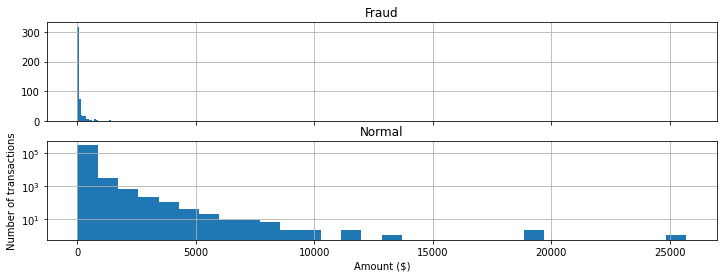

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,  figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class==1], bins=bins)
ax1.set_title('Fraud')
ax1.grid()

ax2.hist(df.Amount[df.Class==0], bins=bins)
ax2.set_title('Normal')
ax2.grid()

plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.yscale('log')
plt.show()

In [ ]:
# 위 그래프를 보면 작은 금액긔 거래에서 비정상 거래가 많이 일어난 것을 볼 수 있지만, 정상 거래 데이터뫄 비교해서 보면 다른
# 특징을 얻기가 없다...
# 대부분의 거래가 적은 금액으로 100 보다 작다.
# 부정 거래는 정상거래보다 훨씬 적은 최대 금액을 가지고 있다.
# 부정 거래 최대금액은 $2125.87  이며, 정상 거래 최대 금액은 $25691 이다. 

In [12]:
df['Amount_max_fraud'] =1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

In [13]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_max_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


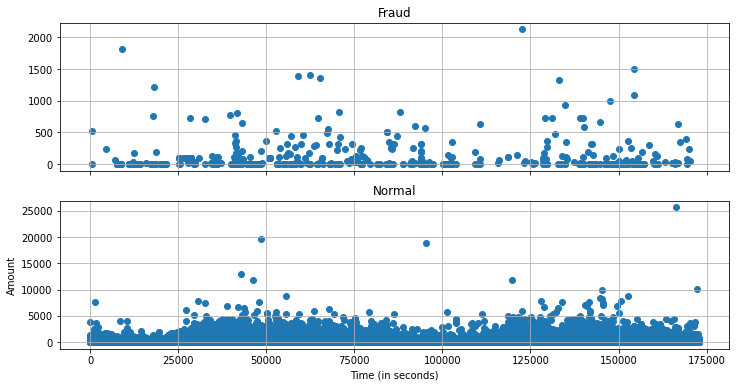

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax1.scatter(df.Time[df.Class==1], df.Amount[df.Class==1])
ax1.set_title('Fraud')
ax1.grid()

ax2.scatter(df.Time[df.Class==0], df.Amount[df.Class==0])
ax2.set_title('Normal')
ax2.grid()

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

In [15]:
#Select only the anonymized features
v_features = df.ix[:, 1:29].columns

AttributeError: 'DataFrame' object has no attribute 'ix'

In [16]:
#Select only the anonymized features
v_features = df.iloc[:, 1:29].columns

In [17]:
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

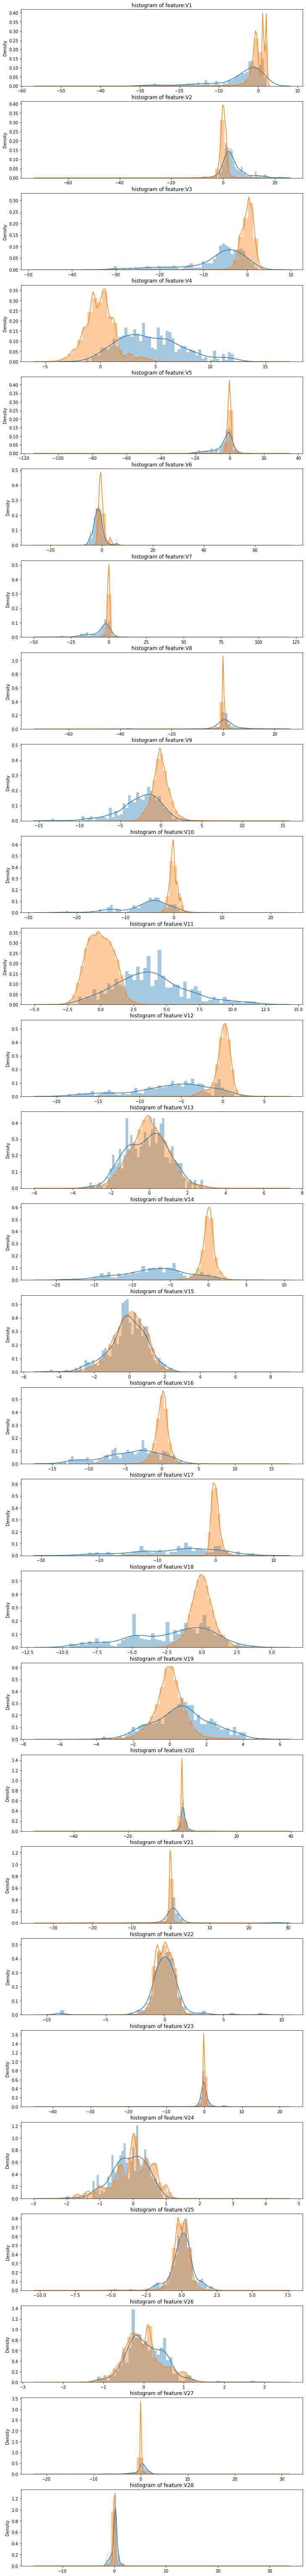

In [18]:
import matplotlib.gridspec as gridspec
import seaborn as sns

plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i , cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class==1], bins=50)
    sns.distplot(df[cn][df.Class==0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature:' + str(cn))
plt.show()

In [19]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_max_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


In [20]:
# Drop  all of the features that have very similar distributions between the two types of transactions.
# 비정상 거래 데이터와 정상 거래 데이터 분포가 비슷한 컬럼은 제거한다...
df = df.drop(['V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8'], axis=1)

In [21]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V12,V14,V16,V17,V18,V19,V21,Amount,Class,Amount_max_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,...,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,0.77,0,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,...,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,24.79,0,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,...,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,67.88,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,...,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,10.00,0,0


In [22]:
# Based on the plots above, these features are created to identify values where frauulent transaction are more common.
df['V1_'] = df.V1.map(lambda x: 1 if x <-3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [23]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,0,0,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,0,0,0,0,0,1,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,0,0,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,...,0,0,0,0,0,0,0,0,0,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,...,0,0,0,0,0,0,0,0,0,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,...,0,0,0,0,0,0,0,0,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,...,0,0,0,0,0,0,0,0,1,0


In [24]:
# Create a new feature for normal (non-fraudulent) transactions.
df.loc[df.Class==0, 'Normal'] = 1
df.loc[df.Class==1, 'Normal'] = 0

In [25]:
# Rename 'Class' to 'Fraud'.
df = df.rename(columns={'Class':'Fraud'})

In [26]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,0,0,0,0,0,0,0,0,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,0,0,0,0,0,0,0,0,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,0,0,0,0,1,0,0,0,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,0,0,0,0,0,0,0,0,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,...,0,0,0,0,0,0,0,0,0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,...,0,0,0,0,0,0,0,0,0,1.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,...,0,0,0,0,0,0,0,0,0,1.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,...,0,0,0,0,0,0,0,1,0,1.0


In [27]:
# 492 fraudulent transactions, 284,315 normal transactions.
# 0.172% of transactions were fraud.
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())

1.0    284315
0.0       492
Name: Normal, dtype: int64

0    284315
1       492
Name: Fraud, dtype: int64


In [28]:
pd.set_option('display.max_columns', 101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Fraud,Amount_max_fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [29]:
# Create dataframes of only Fraud and Normal distributions
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [30]:
# Set X_train equal to 80% of the fraudulent transactions.
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train
X_train = pd.concat([X_train, Normal.sample(frac=0.8)], axis=0)

# X_test contains all the transcation not in X_train
X_test = df.loc[~df.index.isin(X_train.index)]

In [31]:
from sklearn.utils import shuffle

# Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [32]:
# Add our target features to y_train and y_test
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [33]:
# Drop target feature from X_train and X_test
X_train = X_train.drop(['Fraud', 'Normal'], axis=1)
X_test = X_test.drop(['Fraud', 'Normal'], axis=1)

In [34]:
# Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

227846
227846
56961
56961


In [35]:
'''
Due to the imbalanced in the data, ratio will act as an equal weighting system for our model.
By dividing the number of transactions by those that are fraudulent, ratio will equal the value that when multiplied
by the number of fraudulent transactions will equal the number of normal transaction.
Simply put: # of fraud * ratio = # of normal
'''
ratio = len(X_train)/count_Frauds
y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [36]:
# Names of all of the features in X_train
features = X_train.columns.values

# Transform each feature in features so that it has a mean of 0 and standard deviation of 1;
# This helps with training the neural network.
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature]-mean)/std
    X_test.loc[:, feature] = (X_test[feature]- mean)/std

In [37]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Amount_max_fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_
262523,1.383527,-0.210520,0.645038,-0.751907,0.734071,0.631831,-1.018043,0.886148,-0.811396,0.038267,-1.165558,-0.300356,1.289581,-0.871164,0.059413,-0.074281,0.539317,0.477167,-0.174515,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
205488,0.862471,-0.625471,-0.523652,1.344490,2.759434,1.417142,0.098676,-1.030001,-1.036719,0.956893,-1.105762,0.426272,-0.723902,1.212151,-1.005884,0.227442,-1.159404,0.358920,-0.216135,-0.046062,-0.222181,-0.159375,-0.099679,4.235754,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
2801,-1.946904,-1.317177,0.021889,0.239060,0.882486,0.027135,-0.855466,0.352841,-0.032730,0.407186,-0.714704,-0.549706,0.579403,-0.072597,-0.093211,0.252690,0.717448,-0.126596,-0.150366,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
65795,-0.906897,0.603164,0.753536,-0.977835,1.184199,0.610191,-1.166490,0.557004,-0.396824,-1.458144,1.266745,-0.417966,-3.423715,0.752540,3.671650,0.963595,-1.618572,-0.223498,-0.349231,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,8.485780,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
222377,1.013582,0.426949,-1.013703,-1.806073,1.212086,0.262926,-0.421836,1.340694,-0.191573,-0.021153,-0.849696,0.712380,0.634670,-0.763824,-0.317215,-0.611805,-0.547705,0.727889,2.230330,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212675,0.929477,0.965675,0.269128,-0.391596,2.578609,0.425277,0.421500,-0.015197,-0.747367,1.276506,-1.364784,0.096269,-0.132615,1.080965,-1.127197,-0.349368,-1.943221,0.173505,-0.247360,-0.046062,-0.222181,-0.159375,-0.099679,4.235754,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
18948,-1.367033,0.525645,-0.213894,0.348020,0.100573,-0.656648,-0.636799,-0.092110,0.139658,-0.030095,1.465073,0.422171,0.711635,0.646008,-0.547474,-0.039797,0.340284,-0.291827,0.046579,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
270548,1.459715,-0.745345,0.446084,1.504792,3.266902,0.262625,1.826042,-0.762774,-1.126699,0.820981,-1.133397,-0.624223,0.149059,-1.189791,1.908571,-1.525959,0.509856,-0.123172,-0.243042,-0.046062,-0.222181,-0.159375,-0.099679,4.235754,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
255416,1.313973,1.030795,0.098751,-1.048220,0.239434,0.322103,-0.485471,0.108813,0.104632,-0.211548,1.389570,1.272187,-0.810041,0.485292,0.295116,0.048104,0.327967,-0.398064,-0.345313,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274


In [38]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Amount_max_fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_
123165,-0.378618,0.660484,-0.377753,-0.140174,-0.307292,-0.597390,-0.610843,-0.381812,-0.359931,0.122669,-0.801703,-1.481645,-1.152258,1.513276,1.421177,-1.088462,1.034712,-0.120396,-0.038340,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
59351,-0.968870,-0.788496,0.616068,0.277431,0.723428,-0.033904,-0.622204,-0.009607,-0.921505,-0.567137,-1.004164,0.370567,0.881407,0.010082,0.008396,0.288495,0.698980,0.350827,-0.282423,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
242540,1.194448,-0.071512,0.906052,-0.659379,0.647600,1.364916,-0.202603,1.179460,-0.674793,-0.581311,-1.197208,-0.455426,-1.193302,-0.589633,1.239543,0.617309,0.986763,-0.004894,-0.271908,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
161725,0.413706,-1.380825,0.377787,-0.191454,-2.690689,-0.618135,0.205128,-0.369551,-0.543404,-0.990075,-0.466765,1.627861,0.271852,-0.917804,-0.472441,1.554945,-0.737696,-1.072043,-0.005436,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
130858,-0.323594,0.585680,-0.226464,0.664763,-0.602004,-0.710191,-0.093004,-0.553791,1.275599,-0.902847,1.786902,2.084771,-0.103426,-0.732654,-0.114450,0.062377,0.496538,0.124126,-0.349231,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160809,0.396481,0.690508,-0.534658,0.611951,2.912233,-0.259714,2.510163,-1.228042,0.888839,0.741374,-1.514480,0.594855,-1.346902,-0.182896,0.569507,-1.693935,-2.985330,0.348048,0.266793,-0.046062,-0.222181,-0.159375,-0.099679,4.235754,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
216031,0.958326,-0.903349,-0.013894,1.017495,-0.240550,1.131207,0.527316,0.516589,-0.488400,-0.706074,0.098556,1.092004,-0.342928,1.033489,-1.787968,0.545517,-0.404860,-0.350711,-0.153525,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
21812,-1.325486,0.760462,-0.759945,0.441664,-1.055864,-1.297781,-0.255269,-1.215378,-1.399754,1.521311,0.547005,-1.362376,0.067145,0.265726,0.134719,1.368228,-0.016345,-0.077078,-0.329240,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
153539,0.095500,0.973360,0.220086,-0.030313,2.670823,0.334885,0.953308,-0.518929,0.868896,0.881352,-0.999795,-2.591752,1.000499,1.527995,-0.577826,0.517017,-2.094811,-0.022269,-0.287900,-0.046062,-0.222181,-0.159375,-0.099679,4.235754,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,4.433687,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274


In [ ]:
# Train the Neural Net

In [39]:
# Split the testing data into validataion and testing sets
split = int(len(y_test)/2)

inputX = X_train.as_matrix()
inputY = y_train.as_matrix()
inputX_valid = X_test.as_matrix()[:split]
inputY_valid = y_test.as_matrix()[:split]
inputX_test = X_test.as_matrix()[split:]
inputY_test = y_test.as_matrix()[split:]

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [40]:
# Split the testing data into validataion and testing sets
split = int(len(y_test)/2)

inputX = X_train.values
inputY = y_train.values
inputX_valid = X_test.values[:split]
inputY_valid = y_test.values[:split]
inputX_test = X_test.values[split:]
inputY_test = y_test.values[split:]

In [41]:
import tensorflow as tf

# Number of input nodes
input_nodes = 37

# Multiplier maintains a fixed ratio of nodes between each layer
multiplier =  1.5

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1*multiplier)
hidden_nodes3 = round(hidden_nodes2*multiplier)

# Percent of nodes to keep druing dropout
pkeep = tf.placeholder(tf.float32)

In [42]:
# input
x = tf.placeholder(tf.float32, [None, input_nodes])

# layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev=0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1)+b1)

# layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev=0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2)+b2)

# layer 3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev=0.15))
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3)+b3)
y3 = tf.nn.dropout(y3, pkeep)

# layer 4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev=0.15))
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4)+b4)

# output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
# Parameters
training_epochs = 5 # should be 2000,  it will timeout when uploading
training_dropout= 0.9
display_step = 1 # 10
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [44]:
# Cost function : Cross Entropy
cost = -tf.reduce_sum(y_*tf.log(y))

# We will optimize our model via AdamOptimizer
optimizer= tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct prediction if the most likely value (Fraud or Normal) from softmax equals the target value.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# Note: some code will be commented out below that relate to saving/checkpointing your model.

In [45]:
accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

# Save the best weights so that they can be used to make the final predictions
#checkpoint = "location_on_your_computer/best_model.ckpt"
saver = tf.train.Saver(max_to_keep=1)

# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, 
                                                                            y_: inputY,
                                                                            pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid, 
                                                                                  y_: inputY_valid,
                                                                                  pkeep: 1})

            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Save the weights if these conditions are met.
            #if epoch > 0 and valid_accuracy > max(valid_accuracy_summary) and valid_accuracy > 0.999:
            #    saver.save(sess, checkpoint)
            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print()
    print("Optimization Finished!")
    print()   
    
#with tf.Session() as sess:
    # Load the best weights and show its results
    #saver.restore(sess, checkpoint)
    #training_accuracy = sess.run(accuracy, feed_dict={x: inputX, y_: inputY, pkeep: training_dropout})
    #validation_accuracy = sess.run(accuracy, feed_dict={x: inputX_valid, y_: inputY_valid, pkeep: 1})
    
    #print("Results using the best Valid_Acc:")
    #print()
    #print("Training Accuracy =", training_accuracy)
    #print("Validation Accuracy =", validation_accuracy)

Epoch: 0 Acc = 0.96509 Cost = 77359.01562 Valid_Acc = 0.96629 Valid_Cost =  8258.35840
Epoch: 1 Acc = 0.95724 Cost = 67130.23438 Valid_Acc = 0.95779 Valid_Cost =  7607.93359
Epoch: 2 Acc = 0.96834 Cost = 63840.48828 Valid_Acc = 0.96949 Valid_Cost =  7052.33887
Epoch: 3 Acc = 0.97240 Cost = 61452.38281 Valid_Acc = 0.97247 Valid_Cost =  6832.80566
Epoch: 4 Acc = 0.97738 Cost = 59084.35547 Valid_Acc = 0.97679 Valid_Cost =  6559.38770

Optimization Finished!



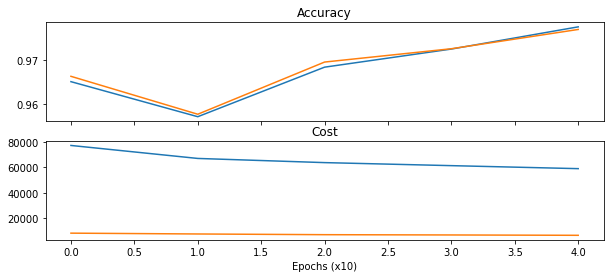

In [46]:
# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary) # blue
ax1.plot(valid_accuracy_summary) # green
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.plot(valid_cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()

In [ ]:
# # Find the predicted values, then use them to build a confusion matrix
# predicted = tf.argmax(y, 1)
# with tf.Session() as sess:  
#    # Load the best weights
#    saver.restore(sess, checkpoint)
#    testing_predictions, testing_accuracy = sess.run([predicted, accuracy], 
#                                                     feed_dict={x: inputX_test, y_:inputY_test, pkeep: 1})
   
#    print("F1-Score =", f1_score(inputY_test[:,1], testing_predictions))
#    print("Testing Accuracy =", testing_accuracy)
#    print()
#    c = confusion_matrix(inputY_test[:,1], testing_predictions)
#    show_confusion_matrix(c, ['Fraud', 'Normal'])

In [ ]:
# Although the neural network can detect most of the fraudulent transactions (82.93%), there are 
# still some that got away. About 0.10% of normal transactions were classified as fraudulent, 
# which can unfortunately add up very quickly given the large number of credit card transactions 
# that occur each minute/hour/day. Nonetheless, this models performs reasonably well and I expect 
# that if we had more data, and if the features were not pre-transformed, we could have created 
# new features, and built a more useful neural network.

In [ ]:
X_train